In [1]:
# AI4I 2020

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
df = pd.read_csv('data/ai4i2020.csv')
df.head()
#df.info()
#df.describe()
#print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns")



,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


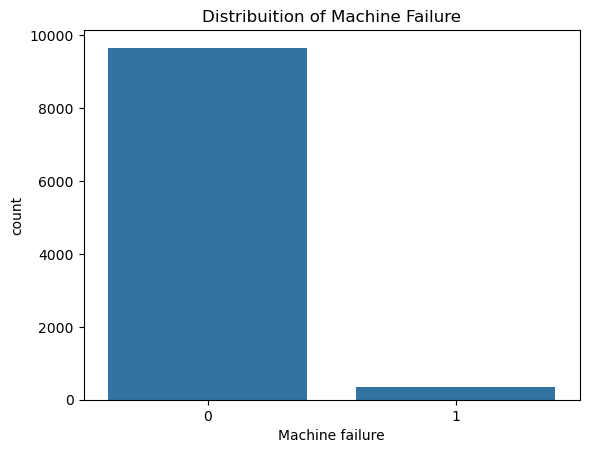

In [9]:
df['Machine failure'].value_counts()

# Machine failure
#0    9661
#1     339
#Name: count, dtype: int64

sns.countplot(x='Machine failure', data=df)
plt.title('Distribuition of Machine Failure')
plt.show()


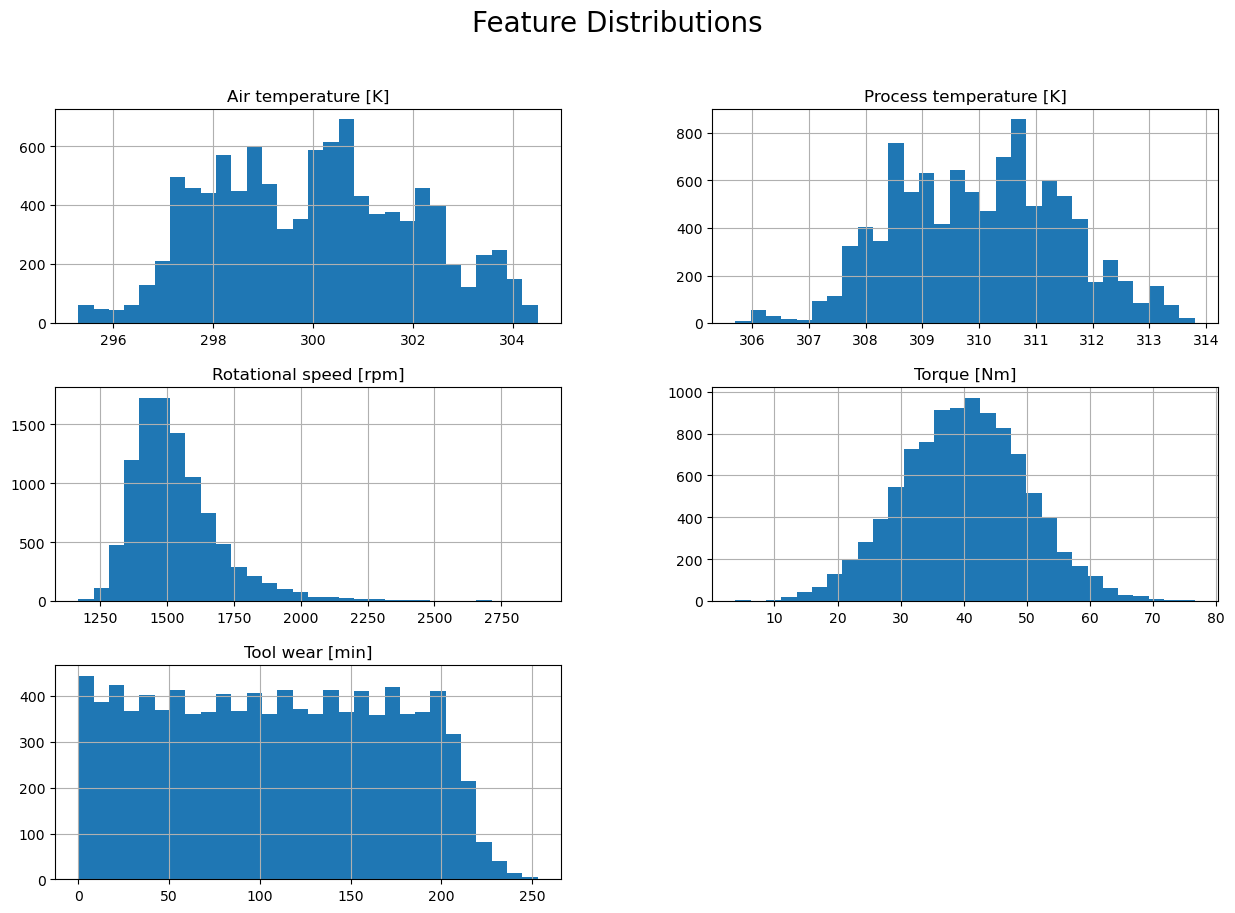

In [10]:
# Plot histograms of continuous features
df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']].hist(bins=30, figsize=(15,10))
plt.suptitle('Feature Distributions', fontsize=20)
plt.show()


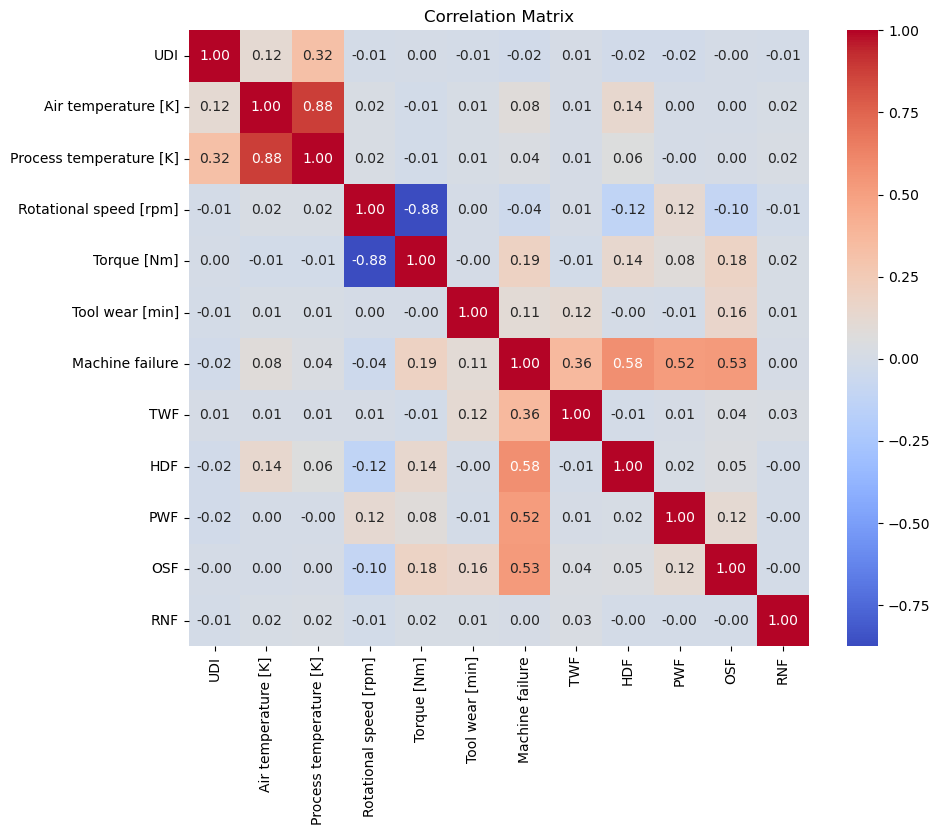

In [12]:
# correlation between features
plt.figure(figsize=(10,8))
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [13]:
# Drop useless or dangerous columns
df_clean = df.drop(['UDI', 'Product ID', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1)

# Optional: check again
df_clean.head()


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


In [15]:
# Separate target and features
X = df_clean.drop('Machine failure', axis=1)
y = df_clean['Machine failure']


In [16]:
# One-Hot Encode the 'Type' column
X = pd.get_dummies(X, columns=['Type'], drop_first=True)

# Check how it looks now
X.head()


,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_L,Type_M
0,298.1,308.6,1551,42.8,0,False,True
1,298.2,308.7,1408,46.3,3,True,False
2,298.1,308.5,1498,49.4,5,True,False
3,298.2,308.6,1433,39.5,7,True,False
4,298.2,308.7,1408,40.0,9,True,False


In [17]:
from sklearn.model_selection import train_test_split

# First split into Train and Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Create model
model = RandomForestClassifier(random_state=42)

# 5-fold Cross-Validation
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')

print("F1 scores for each fold:", scores)
print("Mean F1 score across folds:", scores.mean())


F1 scores for each fold: [0.58823529 0.61538462 0.73913043 0.69662921 0.65882353]
Mean F1 score across folds: 0.6596406174359564


In [19]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# List of models to compare
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(random_state=42)
}

# Dictionary to store results
results = {}

# Loop through models
for model_name, model in models.items():
    # Cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
    results[model_name] = scores
    print(f"{model_name} - Mean F1: {scores.mean():.4f} - All F1 scores: {scores}")

# Optional: Show nicely
print("\nSummary:")
for model_name, scores in results.items():
    print(f"{model_name}: Mean F1 = {scores.mean():.4f}")


Random Forest - Mean F1: 0.6596 - All F1 scores: [0.58823529 0.61538462 0.73913043 0.69662921 0.65882353]
Gradient Boosting - Mean F1: 0.7150 - All F1 scores: [0.70454545 0.68965517 0.7        0.74725275 0.73333333]
Logistic Regression - Mean F1: 0.3066 - All F1 scores: [0.38356164 0.19047619 0.42666667 0.28985507 0.24242424]
SVM - Mean F1: 0.0000 - All F1 scores: [0. 0. 0. 0. 0.]

Summary:
Random Forest: Mean F1 = 0.6596
Gradient Boosting: Mean F1 = 0.7150
Logistic Regression: Mean F1 = 0.3066
SVM: Mean F1 = 0.0000


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# 1. Define model
gb = GradientBoostingClassifier(random_state=42)

# 2. Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],      # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],   # Step size shrinkage
    'max_depth': [3, 4, 5]               # Maximum depth of trees
}

# 3. Setup GridSearch
grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    cv=5,                        # 5-fold CV
    scoring='f1',                 # Optimize for F1-score
    n_jobs=-1,                    # Use all CPU cores
    verbose=2                     # Print progress
)

# 4. Fit on training data
grid_search.fit(X_train, y_train)

# 5. Best results
print("Best parameters:", grid_search.best_params_)
print("Best F1 score:", grid_search.best_score_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.3s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.3s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.3s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.3s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.6s
[CV] END ...learning_rate=0.01, max_depth=4, n_estimators=50; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

# Let's retrain Gradient Boosting with these parameters on the full Training Set!

In [21]:
# Retrain with best parameters
final_model = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=4,
    n_estimators=150,
    random_state=42
)

# Fit on training data
final_model.fit(X_train, y_train)


GradientBoostingClassifier(max_depth=4, n_estimators=150, random_state=42)

# 📋 Then let's evaluate on the TEST set:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1932
           1       0.89      0.71      0.79        68

    accuracy                           0.99      2000
   macro avg       0.94      0.85      0.89      2000
weighted avg       0.99      0.99      0.99      2000



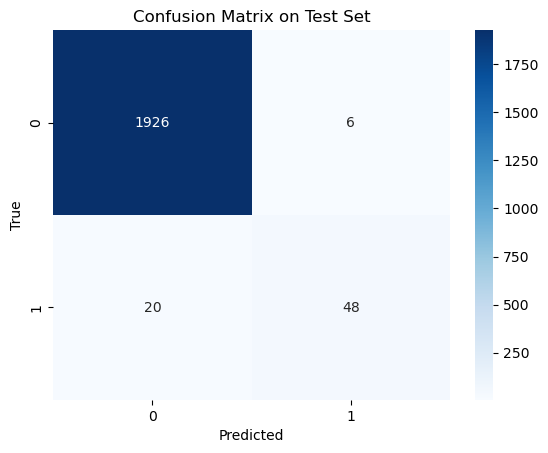

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on test data
y_pred = final_model.predict(X_test)

# Print detailed report
print(classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix on Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [23]:
# Get probabilities
y_pred_proba = final_model.predict_proba(X_test)[:,1]

# Adjust threshold
threshold = 0.4
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

# Evaluate again
print(classification_report(y_test, y_pred_adjusted))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1932
           1       0.85      0.75      0.80        68

    accuracy                           0.99      2000
   macro avg       0.92      0.87      0.90      2000
weighted avg       0.99      0.99      0.99      2000



In [24]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [26]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# Rename columns to be XGBoost-compatible
X_train.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_train.columns]
X_test.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_test.columns]

# 1. Calculate scale_pos_weight
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos
print(f"scale_pos_weight: {scale_pos_weight:.2f}")

# 2. Define model
xgb_model = XGBClassifier(
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss' # Disable warnings
)

# 3. Cross-validate
scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='f1')

print(f"XGBoost - Mean F1: {scores.mean():.4f}")


scale_pos_weight: 28.52


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:55:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:55:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:55:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:55:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

XGBoost - Mean F1: 0.7313


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:55:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [27]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the base model
xgb_base = XGBClassifier(
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Define the grid to search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Setup the Grid Search
grid_search = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

# Run the search
grid_search.fit(X_train, y_train)

# Print best results
print("Best parameters:", grid_search.best_params_)
print("Best F1 score:", grid_search.best_score_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:00:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:00:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:00:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:00:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=150; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=150; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=150; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=150; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=150; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.0

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:00:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:00:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:00:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:00:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=150; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=150; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=150; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=150; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=150; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.0

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:00:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:00:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:00:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:00:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=150; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=150; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=150; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=150; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=150; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=200; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=200; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.0

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:00:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:00:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:00:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:00:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=150; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=150; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=150; total time=   0.0s
[CV] END ...learning_rate=0.

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:00:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:00:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:00:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:00:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=150; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=150; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=200; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=200; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=150; total time=   0.1s
[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=150; total time=   0.1s
[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=200; total time=   0.1s
[CV] END ...learning_rate=0.

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:00:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:00:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:00:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:00:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=200; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=200; total time=   0.1s
[CV] END ...learning_rate=0.2, max_depth=4, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=150; total time=   0.1s
[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ...learning_rate=0.2, max_depth=4, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.2, max_depth=4, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=200; total time=   0.1s
[CV] END ...learning_rate=0.2, max_depth=4, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:00:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:00:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:00:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:00:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END ...learning_rate=0.2, max_depth=4, n_estimators=150; total time=   0.1s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.2, max_depth=4, n_estimators=200; total time=   0.1s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=150; total time=   0.1s
[CV] END ...learning_rate=0.2, max_depth=4, n_estimators=200; total time=   0.1s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=150; total time=   0.1s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=150; total time=   0.1s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=150; total time=   0.1s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=150; total time=   0.1s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=200; total time=   0.1s
[CV] END ...learning_rate=0.2, max_depth=4, n_estimators=200; total time=   0.1s
[CV] END ...learning_rate=0.

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:00:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [28]:
# Retrain the final model
final_xgb = XGBClassifier(
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    learning_rate=0.2,
    max_depth=5,
    n_estimators=200,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Fit on full training data
final_xgb.fit(X_train, y_train)


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:03:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1932
           1       0.74      0.78      0.76        68

    accuracy                           0.98      2000
   macro avg       0.86      0.88      0.87      2000
weighted avg       0.98      0.98      0.98      2000



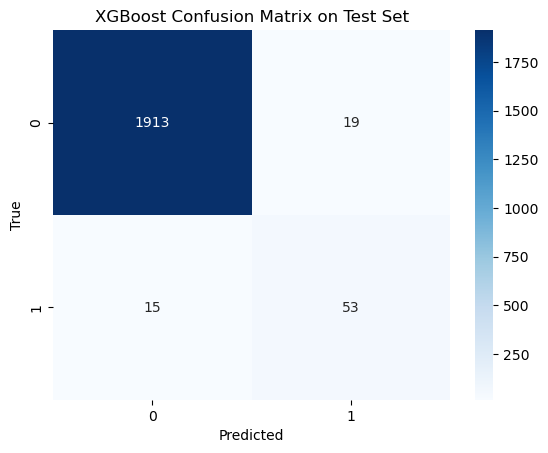

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict
y_pred_xgb = final_xgb.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix on Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1932
           1       0.71      0.79      0.75        68

    accuracy                           0.98      2000
   macro avg       0.85      0.89      0.87      2000
weighted avg       0.98      0.98      0.98      2000



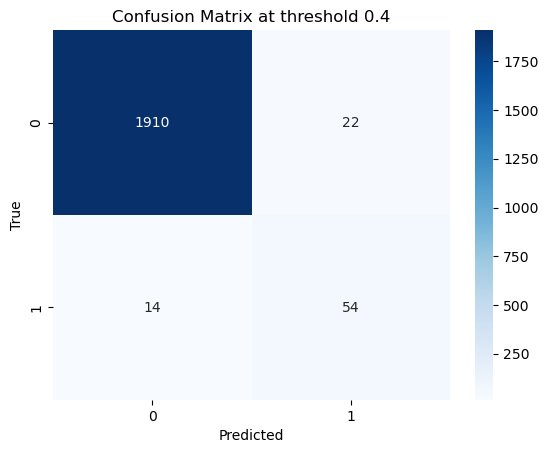

In [ ]:
# Predict probabilities
y_pred_proba = final_xgb.predict_proba(X_test)[:,1]

# Lower threshold
threshold = 0.4  
y_pred_low_thresh = (y_pred_proba >= threshold).astype(int)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_low_thresh))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_low_thresh), annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix at threshold {threshold}')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [35]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [36]:
from imblearn.over_sampling import SMOTE

# Create SMOTE object
smote = SMOTE(random_state=42)

# Apply only on training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Original dataset shape: {X_train.shape} {np.bincount(y_train)}")
print(f"After SMOTE dataset shape: {X_train_smote.shape} {np.bincount(y_train_smote)}")


Original dataset shape: (8000, 7) [7729  271]
After SMOTE dataset shape: (15458, 7) [7729 7729]


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1932
           1       0.62      0.81      0.70        68

    accuracy                           0.98      2000
   macro avg       0.81      0.90      0.84      2000
weighted avg       0.98      0.98      0.98      2000



/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:10:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


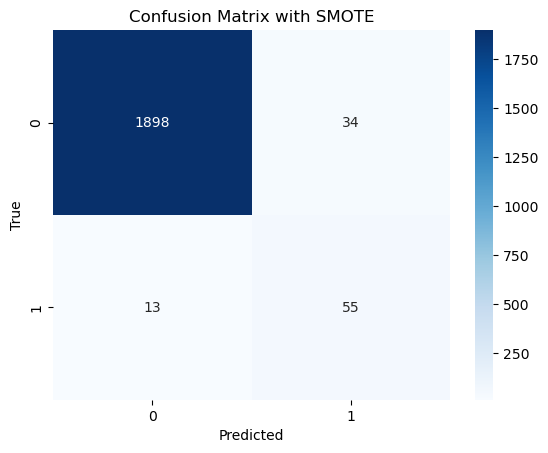

In [37]:
# Retrain model
final_xgb_smote = XGBClassifier(
    random_state=42,
    learning_rate=0.2,
    max_depth=5,
    n_estimators=200,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Fit on SMOTE training data
final_xgb_smote.fit(X_train_smote, y_train_smote)

# Predict on test set
y_pred_smote = final_xgb_smote.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred_smote))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_smote), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix with SMOTE')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1932
           1       0.56      0.81      0.66        68

    accuracy                           0.97      2000
   macro avg       0.77      0.89      0.82      2000
weighted avg       0.98      0.97      0.97      2000



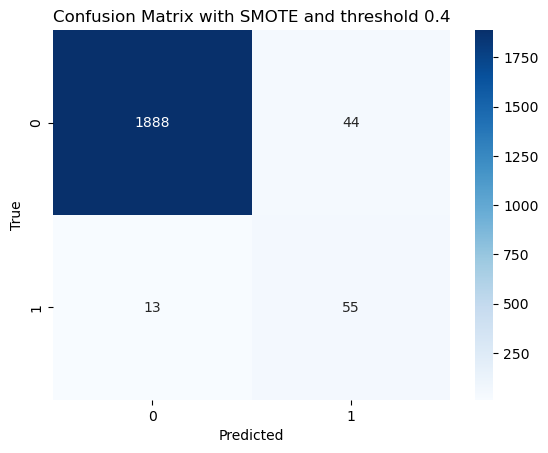

In [38]:
# Predict probabilities
y_pred_proba_smote = final_xgb_smote.predict_proba(X_test)[:,1]

# Set a lower threshold
threshold = 0.4  # (We can even try 0.35 later)

# Apply the threshold
y_pred_smote_low_thresh = (y_pred_proba_smote >= threshold).astype(int)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_smote_low_thresh))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_smote_low_thresh), annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix with SMOTE and threshold {threshold}')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


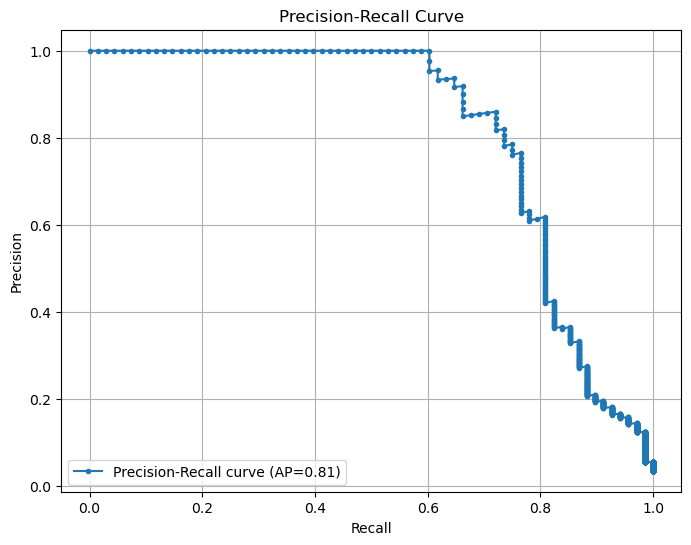

In [39]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Predict probabilities from your final model (SMOTE + threshold)
y_pred_proba_smote = final_xgb_smote.predict_proba(X_test)[:,1]

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_smote)

# Average precision score (area under the curve)
avg_precision = average_precision_score(y_test, y_pred_proba_smote)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.', label=f'Precision-Recall curve (AP={avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


In [40]:
import pickle

# Save the final model
with open('final_xgb_smote_model.pkl', 'wb') as f:
    pickle.dump(final_xgb_smote, f)

print("✅ Model saved as 'final_xgb_smote_model.pkl'")


✅ Model saved as 'final_xgb_smote_model.pkl'


In [ ]:
# Load the saved model
with open('final_xgb_smote_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Predict with loaded model
y_pred_loaded = loaded_model.predict(X_test)



AttributeError: 'numpy.ndarray' object has no attribute 'describe'